In [1]:
import sympy as spy
import numpy as np
from IPython.display import display
spy.init_printing()

In [2]:
r, a0, theta, phi, h = spy.symbols("r, a_0, \\theta, \phi, \hbar", real=True, positive=True)
dv = r**2*spy.sin(theta)
pos = [r, theta, phi]

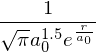

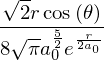

In [3]:
R_10 = 2*a0**(-3/2)*spy.exp(-r/a0)
R_21 = 1/spy.sqrt(6*a0**3)*(r/(2*a0))*spy.exp(-r/(2*a0))
Y_00 = 1/spy.sqrt(4*spy.pi)
Y_10 = spy.sqrt(3/(4*spy.pi))*spy.cos(theta)
psi_100 = R_10*Y_00
psi_210 = R_21*Y_10
display(psi_100)
display(psi_210)

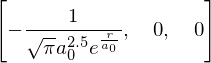

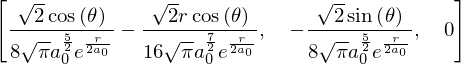

In [4]:
grad_100 = [psi_100.diff(r), 0, 0]
grad_210 = [psi_210.diff(r), psi_210.diff(theta)/r, 0]
display(grad_100)
display(grad_210)

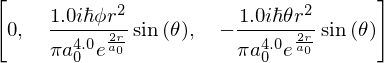

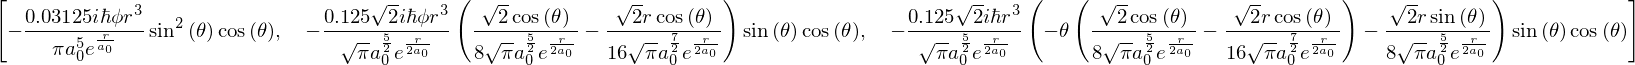

In [5]:
momentum_100 = -1j*h*np.cross(pos, grad_100)
momentum_210 = -1j*h*np.cross(pos, grad_210)
esp_100 = list(momentum_100*psi_100*dv)
esp_210 = list(momentum_210*psi_210*dv)
display(esp_100)
display(esp_210)

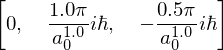

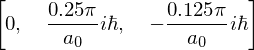

In [6]:
int_100 = []
int_210 = []
for i in range(3):
    val_100 = esp_100[i]
    val_210 = esp_210[i]
    half_100 = spy.integrate(val_100, (theta, 0, spy.pi), (phi, 0, 2*spy.pi), (r, 0, spy.oo))
    half_210 = spy.integrate(val_210.simplify(), (phi, 0, 2*spy.pi), (theta, 0, spy.pi), (r, 0, spy.oo))
    int_100.append(half_100)
    int_210.append(half_210)
display(int_100)
display(int_210)

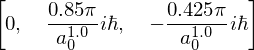

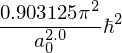

In [7]:
expected_L = [0]*3
for i in range(3):
    expected_L[i] = ((4/5)*int_100[i] + (1/5)*int_210[i]).simplify()
    
mag = -np.dot(expected_L, expected_L)
display(expected_L)
display(mag)

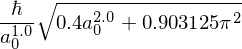

In [8]:
uncertainty = spy.sqrt((2/5)*h**2 + mag)
display(uncertainty.simplify())